<a href="https://colab.research.google.com/github/CWill22/NeuralHW4/blob/main/HW4_Probability_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import useful libraries

In [1]:
import numpy as np
import scipy.stats as st
import scipy.signal as signal
import matplotlib.pyplot as plt

## (i) Probability distributions

Use *scipy.stats* module to work on different probability distributions. Use documentation [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

## Bernoulli Distribution

**Description:**  
The Bernoulli distribution models a binary outcome. A random variable \(X\) follows a Bernoulli distribution if it can take the value 1 with probability \(p\) (success) and 0 with probability \(1-p\) (failure).

**Equation:**  
$$
P(X = x) = p^x (1-p)^{1-x}, \quad x \in \{0,1\},
$$

where:
- \(p\) is the probability of success (i.e., \(X = 1\)).
- \(1-p\) is the probability of failure (i.e., \(X = 0\)).


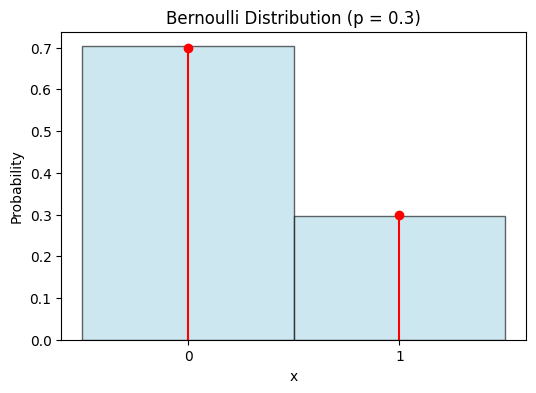

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set seed for reproducibility
np.random.seed(0)

# Bernoulli Distribution parameters
p = 0.3
N = 10000

# Generate samples
samples = np.random.binomial(n=1, p=p, size=N)

# Create bins centered on 0 and 1
bins = [-0.5, 0.5, 1.5]

plt.figure(figsize=(6, 4))
plt.hist(samples, bins=bins, density=True, alpha=0.6, color='lightblue', edgecolor='black')

# Theoretical PMF values
x_vals = [0, 1]
pmf = [1 - p, p]
plt.stem(x_vals, pmf, linefmt='r-', markerfmt='ro', basefmt=" ")

plt.title("Bernoulli Distribution (p = 0.3)")
plt.xlabel("x")
plt.ylabel("Probability")
plt.xticks(x_vals)
plt.show()


# Uniform Distribution

**Description:**  
The continuous Uniform distribution over the interval \([a, b]\) assumes that every value within this interval is equally likely. The probability density function (PDF) is constant for $x \in [a, b]$.

**Equation:**  
$$
f(x) = \frac{1}{b - a}, \quad \text{for } a \le x \le b.
$$  
where:
- \(a\) is the lower bound.
- \(b\) is the upper bound.


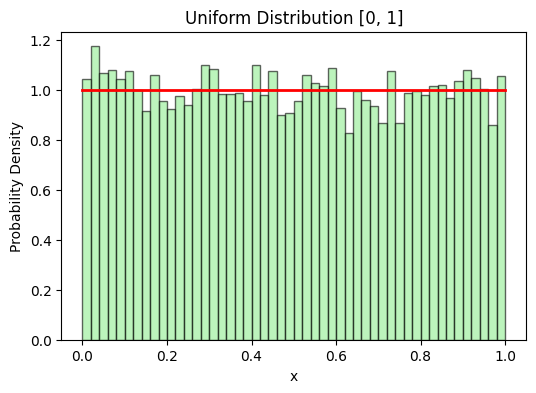

In [3]:
# Uniform Distribution parameters
a, b = 0, 1

# Generate samples
samples = np.random.uniform(low=a, high=b, size=N)

plt.figure(figsize=(6, 4))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='lightgreen', edgecolor='black')

# Theoretical PDF calculation
x = np.linspace(a, b, 100)
pdf = stats.uniform.pdf(x, loc=a, scale=b - a)
plt.plot(x, pdf, 'r', lw=2)

plt.title("Uniform Distribution [0, 1]")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.show()


# Poisson Distribution

**Description:**  
The Poisson distribution is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space. These events occur with a known constant mean rate \(\lambda\) and independently of the time since the last event.

**Equation:**  
$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k = 0, 1, 2, \ldots,
$$  
where:
- λ is the average rate (mean number of occurrences).
- \(k!\) is the factorial of \(k\).



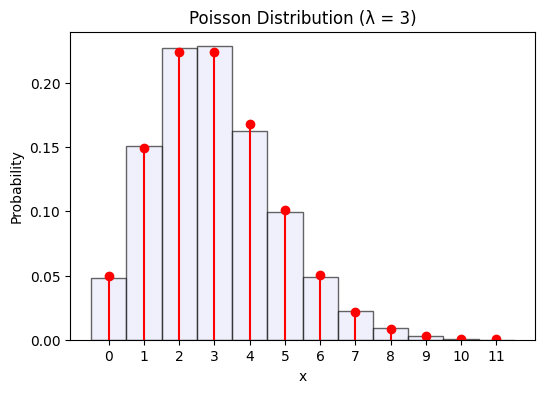

In [4]:
# Poisson Distribution parameters
lam = 3

# Generate samples
samples = np.random.poisson(lam=lam, size=N)

plt.figure(figsize=(6, 4))
max_val = np.max(samples)
bins = np.arange(0, max_val + 2) - 0.5
plt.hist(samples, bins=bins, density=True, alpha=0.6, color='lavender', edgecolor='black')

# Theoretical PMF calculation
x = np.arange(0, max_val + 1)
pmf = stats.poisson.pmf(x, mu=lam)
plt.stem(x, pmf, linefmt='r-', markerfmt='ro', basefmt=" ")

plt.title("Poisson Distribution (λ = 3)")
plt.xlabel("x")
plt.ylabel("Probability")
plt.xticks(x)
plt.show()


# Gaussian (Normal) Distribution

**Description:**  
The Gaussian distribution (or Normal distribution) is a continuous probability distribution that is symmetric about its mean μ. It is defined by the mean μ and the standard deviation σ. This distribution is used to model many natural phenomena.

**Equation:**  
$$
f(x) = \frac{1}{\sqrt{(2\pi}\,\sigma)} \exp\left( -\frac{(x-\mu)^2}{2\sigma^2} \right),
$$  
where:
- μ is the mean.
- σ is the standard deviation.


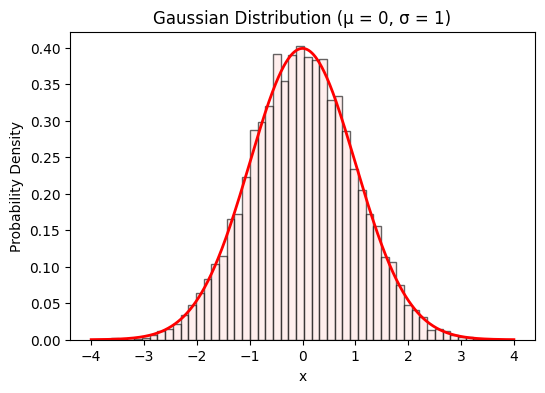

In [5]:
# Gaussian Distribution parameters
mu, sigma = 0, 1

# Generate samples
samples = np.random.normal(loc=mu, scale=sigma, size=N)

plt.figure(figsize=(6, 4))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='mistyrose', edgecolor='black')

# Theoretical PDF calculation
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
pdf = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, pdf, 'r', lw=2)

plt.title("Gaussian Distribution (μ = 0, σ = 1)")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.show()


# Log-Normal Distribution

**Description:**  
A random variable \(X\) is said to be log-normally distributed if its logarithm, $\ln(X)$, is normally distributed. This distribution is useful for modeling data that are positively skewed and must be positive.

**Equation:**  
$$
f(x) = \frac{1}{x\,\sigma \sqrt{(2\pi)}} \exp\left( -\frac{(\ln(x) - \mu)^2}{2\sigma^2} \right), \quad x > 0,
$$  
where:
- $\mu$ and $\sigma$ are the mean and standard deviation of the underlying normal distribution of $\ln(x)$.


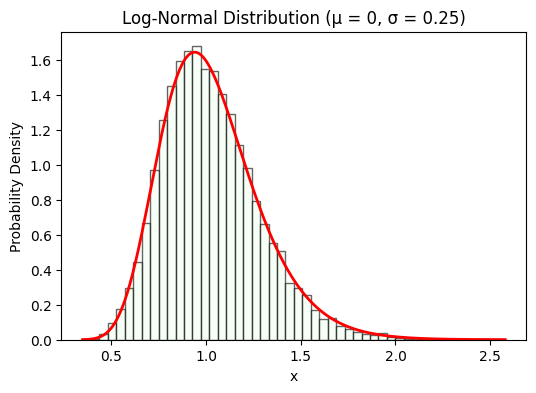

In [6]:
# Log-Normal Distribution parameters
mu_ln, sigma_ln = 0, 0.25

# Generate samples
samples = np.random.lognormal(mean=mu_ln, sigma=sigma_ln, size=N)

plt.figure(figsize=(6, 4))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='honeydew', edgecolor='black')

# Theoretical PDF calculation
x = np.linspace(np.min(samples), np.max(samples), 1000)
pdf = stats.lognorm.pdf(x, s=sigma_ln, scale=np.exp(mu_ln))
plt.plot(x, pdf, 'r', lw=2)

plt.title("Log-Normal Distribution (μ = 0, σ = 0.25)")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.show()


## (ii) Time series of noise

What is [Colored noise](https://en.wikipedia.org/wiki/Colors_of_noise)?

Specify properties of the time series

In [7]:
fs = 1000 # 1000 Hz sampling frequency of time series
N = 10000 # length of the time series (10 sec)
t = np.arange(N) / fs * 1000 # time points in ms

# White Noise

**Description:**  
White noise is a random signal with a constant power spectral density, meaning that all frequencies have equal power. It is often modeled as a sequence of independent, identically distributed Gaussian random variables.

**Equation (for Gaussian white noise):**  
$$
x[n] \sim 𝒩(0, \sigma^2), \quad n = 1, 2, \ldots, N,
$$  
where:
- $𝒩(0, \sigma^2)$ denotes a Gaussian distribution with zero mean and variance $\sigma^2$.



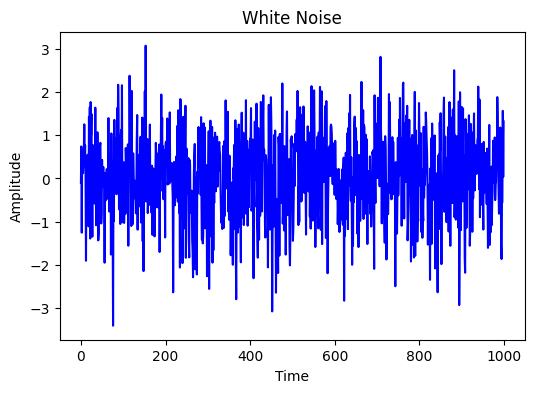

In [8]:
# White Noise generation
N_noise = 1000
white_noise = np.random.randn(N_noise)

plt.figure(figsize=(6, 4))
plt.plot(white_noise, color='blue')
plt.title("White Noise")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


# Brownian Noise (Random Walk Noise)

**Description:**  
Brownian noise, also known as random walk noise, is generated by taking the cumulative sum of white noise. This produces a signal that drifts over time, characteristic of a random walk.

**Equation:**  
Given white noise \(w[n]\), the Brownian noise \(B[n]\) is defined as:
$$
B[n] = \sum_{k=1}^{n} w[k],
$$  
where:
- \(w[k]\) is the white noise at step \(k\).


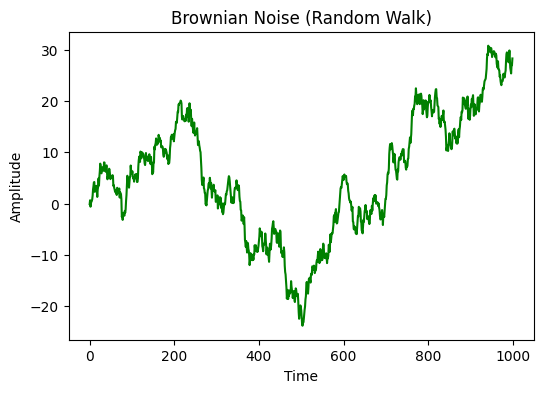

In [9]:
# Generate Brownian Noise by cumulative summing the white noise
brownian_noise = np.cumsum(white_noise)

plt.figure(figsize=(6, 4))
plt.plot(brownian_noise, color='green')
plt.title("Brownian Noise (Random Walk)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


# Pink Noise

**Description:**  
Pink noise, also known as \(1/f\) noise, has a power spectral density that is inversely proportional to the frequency, meaning that lower frequencies contain more power than higher frequencies.

**Equation:**  
The ideal power spectral density \(S(f)\) of pink noise is given by:
$$
S(f) \propto \frac{1}{f},
$$  
where:
- \(f\) represents frequency.


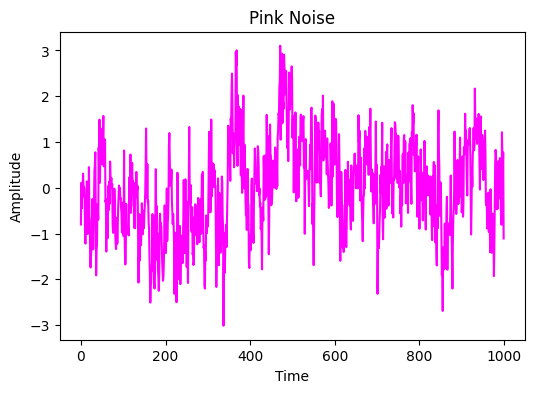

In [10]:
# Function to generate Pink Noise using a frequency-domain filtering method
def generate_pink_noise(n_samples):
    """
    Generate pink noise using a frequency-domain filtering method.
    The power spectral density of pink noise is proportional to 1/f.
    """
    # Generate white noise
    white = np.random.randn(n_samples)
    # Fourier transform of white noise
    fft = np.fft.rfft(white)
    # Get frequencies corresponding to fft components
    freqs = np.fft.rfftfreq(n_samples)
    # Avoid division by zero for the DC component; scale the rest
    fft[1:] = fft[1:] / np.sqrt(freqs[1:])
    # Inverse Fourier transform to obtain pink noise
    pink = np.fft.irfft(fft, n=n_samples)
    # Normalize the pink noise to zero mean and unit variance
    pink = (pink - np.mean(pink)) / np.std(pink)
    return pink

# Generate Pink Noise
pink_noise = generate_pink_noise(N_noise)

plt.figure(figsize=(6, 4))
plt.plot(pink_noise, color='magenta')
plt.title("Pink Noise")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()
